In [1]:
!pip install praw

  Obtaining dependency information for praw from https://files.pythonhosted.org/packages/81/6a/21bc058bcccbe03f6a0895bf1bd60c805f0c526aa4e9bfaac775ed0b299c/praw-7.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for prawcore<3,>=2.1 from https://files.pythonhosted.org/packages/96/5c/8af904314e42d5401afcfaff69940dc448e974f80f7aa39b241a4fbf0cf1/prawcore-2.4.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   ------------ --------------------------- 61.4/191.0 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 184.3/191.0 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 191.0/191.0 kB 1.9 MB/s eta 0:00:00


## Reddit API Authentication

In [2]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="DcyXG2z-Ud3hSjn9xeAqrg",
    client_secret="h9BdnESVlkGpi33zxqdtnJPZ1qhS6A",
    user_agent=user_agent
)

In [3]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## New rising topics on selected word

In [13]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("Spacex").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Starship Development Thread #53
19251pv
ElongatedMuskrat
1704771606.0
178
0.94
https://www.reddit.com/r/spacex/comments/19251pv/starship_development_thread_53/
0


## Selecting headlines of subreddits on selected topic 

In [14]:
headlines = set()
for submission in reddit.subreddit("Spacex").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

997


## Creating dataset

In [15]:
#Create a dataframe from the scrapped data 
df = pd.DataFrame(headlines)
df.head()

,0
0,r/SpaceX Starlink 7-13 Official Launch Discuss...
1,SpaceX reportedly turned a profit in the first...
2,r/SpaceX Euclid Official Launch Discussion & U...
3,Ben Cooper on Twitter: “NASA's Crew-6 during r...
4,SpaceX on X: Full-pressure test of Starship fl...


In [16]:
df.columns

RangeIndex(start=0, stop=1, step=1)

In [17]:
df.columns = ['Titles']

In [18]:
df.head()

,Titles
0,r/SpaceX Starlink 7-13 Official Launch Discuss...
1,SpaceX reportedly turned a profit in the first...
2,r/SpaceX Euclid Official Launch Discussion & U...
3,Ben Cooper on Twitter: “NASA's Crew-6 during r...
4,SpaceX on X: Full-pressure test of Starship fl...


In [20]:
df.Titles.duplicated().sum() 

0

## Cleaning headlines

In [22]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
df["Titles"]= df["Titles"].apply(cleanTxt)



In [23]:
#Show the cleandf.head()
df.head()

,Titles
0,r/SpaceX Starlink 7-13 Official Launch Discuss...
1,SpaceX reportedly turned a profit in the first...
2,r/SpaceX Euclid Official Launch Discussion & U...
3,Ben Cooper on Twitter “NASA's Crew-6 during re...
4,SpaceX on X Full-pressure test of Starship fla...


In [24]:

#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
df["Titles"]= df["Titles"].apply(remove_emoji)

#Show the clean text
df.head()

,Titles
0,r/SpaceX Starlink 7-13 Official Launch Discuss...
1,SpaceX reportedly turned a profit in the first...
2,r/SpaceX Euclid Official Launch Discussion & U...
3,Ben Cooper on Twitter “NASA's Crew-6 during re...
4,SpaceX on X Full-pressure test of Starship fla...


In [25]:
!pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     ----- --------------------------------- 92.2/636.8 kB 1.7 MB/s eta 0:00:01
     -------------------------- ----------- 450.6/636.8 kB 4.7 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 5.0 MB/s eta 0:00:00


In [26]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

## Getting polarity and Insight

In [27]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['Titles'].apply(getSubjectivity)
df['Polarity'] = df['Titles'].apply(getPolarity)

#Now display data
df.head()

,Titles,Subjectivity,Polarity
0,r/SpaceX Starlink 7-13 Official Launch Discuss...,0.000000,0.00
1,SpaceX reportedly turned a profit in the first...,0.333333,0.25
2,r/SpaceX Euclid Official Launch Discussion & U...,0.000000,0.00
3,Ben Cooper on Twitter “NASA's Crew-6 during re...,0.175000,-0.05
4,SpaceX on X Full-pressure test of Starship fla...,0.000000,0.00


In [28]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Insight"] = df["Polarity"].apply(getInsight)

df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,r/SpaceX Starlink 7-13 Official Launch Discuss...,0.000000,0.000000,Neutral
1,SpaceX reportedly turned a profit in the first...,0.333333,0.250000,Positive
2,r/SpaceX Euclid Official Launch Discussion & U...,0.000000,0.000000,Neutral
3,Ben Cooper on Twitter “NASA's Crew-6 during re...,0.175000,-0.050000,Negative
4,SpaceX on X Full-pressure test of Starship fla...,0.000000,0.000000,Neutral
5,Transporter-6 - What a show! From launch to la...,0.750000,-0.187500,Negative
6,NASA next Starship launch is a propellant tran...,0.000000,0.000000,Neutral
7,Tranche 0 Update Good news from PWSA Tranche 0...,0.593333,0.355000,Positive
8,"[OC] With the delay of the SDA launch, SpaceX ...",0.400000,-0.150000,Negative
9,Jellyfish and booster reentry from the KSC pre...,0.000000,0.000000,Neutral


In [29]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [31]:
df.head()

,Titles,Subjectivity,Polarity,Insight
0,r/SpaceX Starlink 7-13 Official Launch Discuss...,0.000000,0.00,Neutral
1,SpaceX reportedly turned a profit in the first...,0.333333,0.25,Positive
2,r/SpaceX Euclid Official Launch Discussion & U...,0.000000,0.00,Neutral
3,Ben Cooper on Twitter “NASA's Crew-6 during re...,0.175000,-0.05,Negative
4,SpaceX on X Full-pressure test of Starship fla...,0.000000,0.00,Neutral


## Visualizing sentiment score

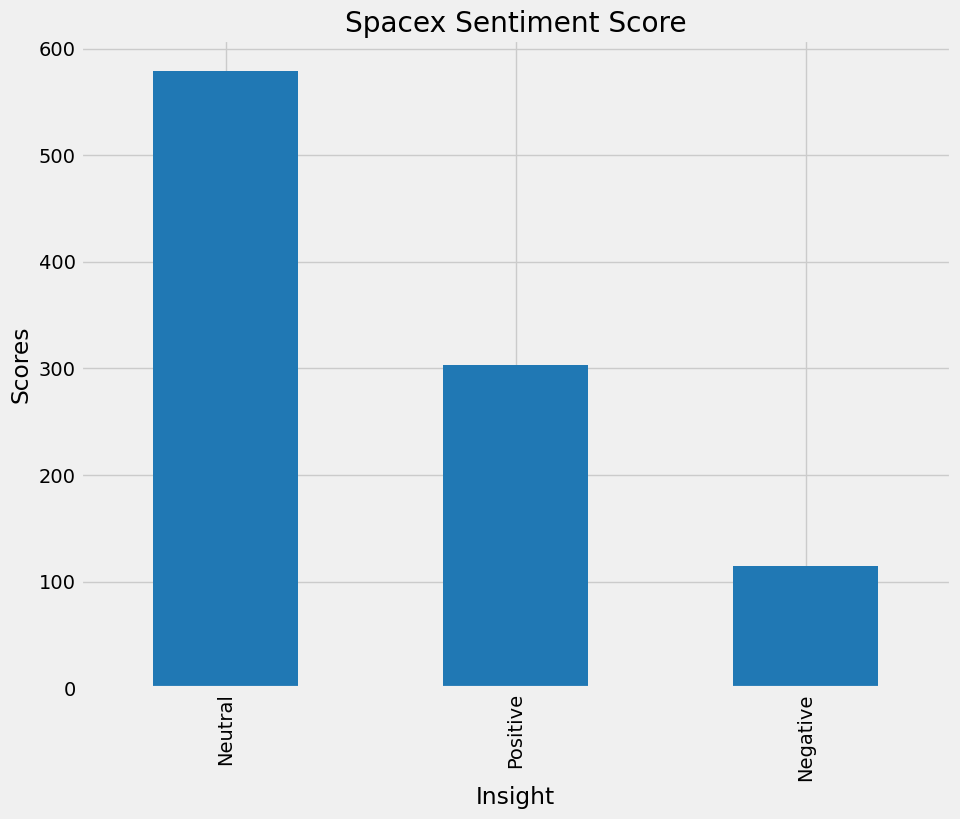

In [32]:
#Plot the values count of sentiment
plt.title("Spacex Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## Creating WordCloud

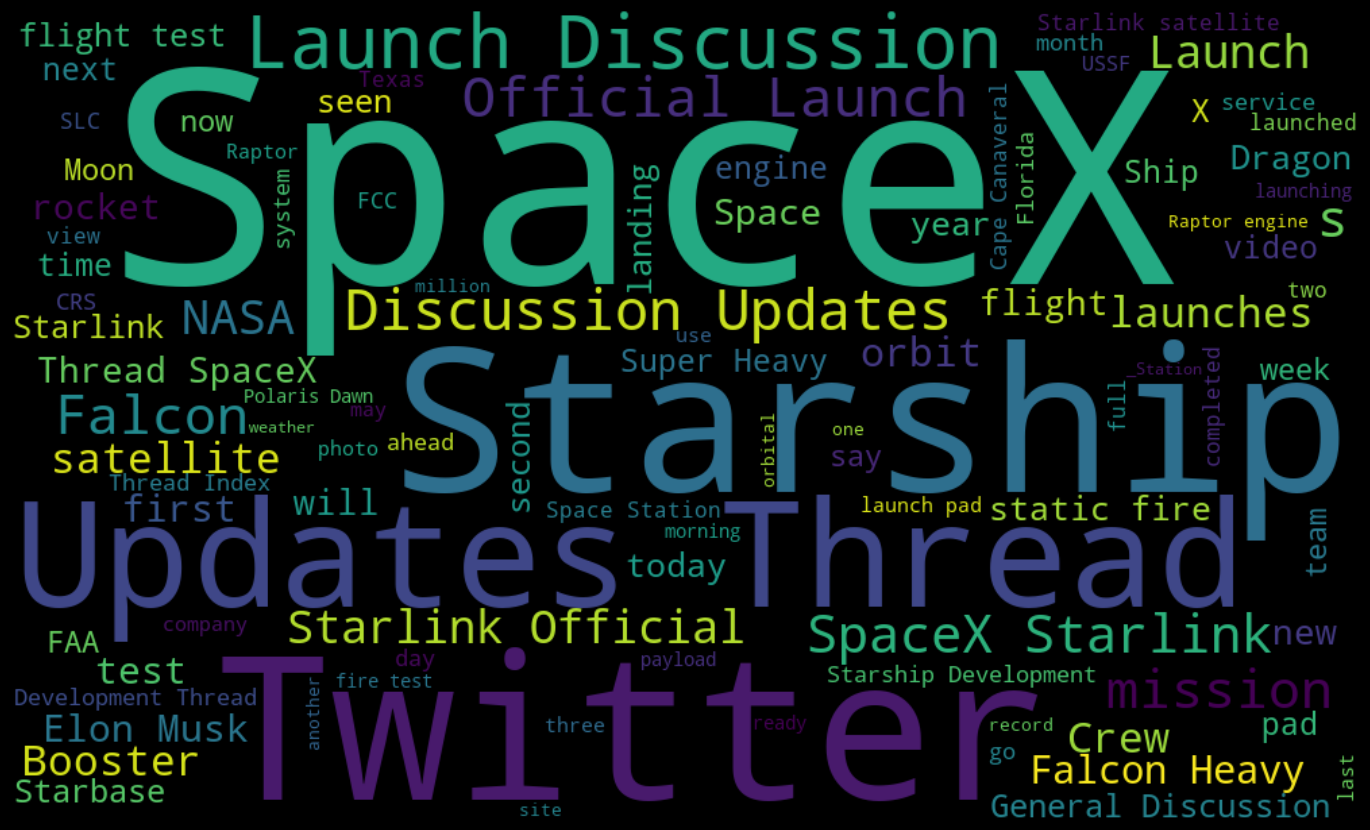

In [33]:
text = ' '.join( [twts for twts in df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
